In [2]:
!pip install qiskit ipywidgets
!pip install pylatexenc


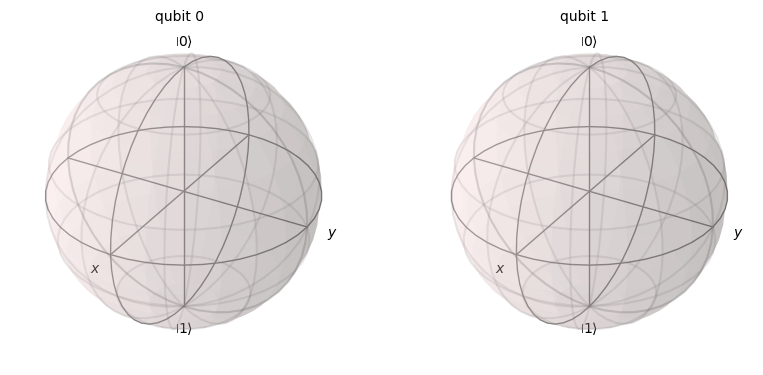

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
#having a bell state
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
state=Statevector.from_instruction(qc) # getting output using .from_instruction()
#having statevector, let us use Bloch sphere
state.draw('bloch')

In [6]:
#since states are completely entangled, we observe nothing on Bloch sphere

In [7]:
#Deutsch-Jozsa using BasicSimulator

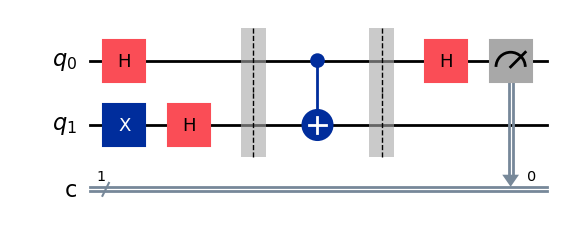

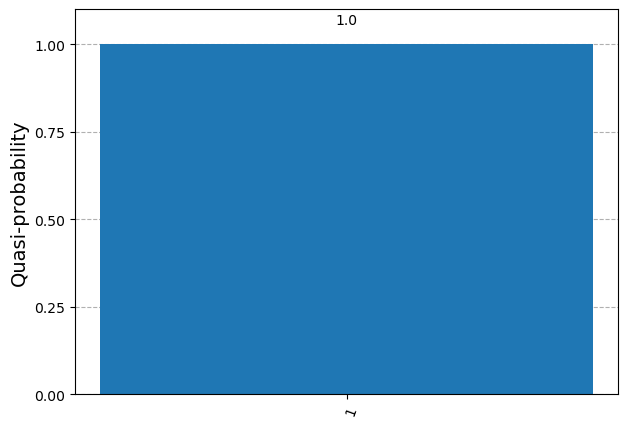

In [8]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_distribution
#first defining the object for simulator:
simulator_basic=BasicSimulator()

#for this Algorithm, we need quantum circuit (2 qubit), and only 1 classical bit for measurement
qc=QuantumCircuit(2,1)
qc.x(1)
qc.h(range(2))
qc.barrier(range(2))

#figuring out what the function is here. balanced or constant, function could be identity, or constant (eg. CNOT)
#function
qc.cx(0,1) #Balanced
#qc.x(range(2)) #constant
qc.barrier(range(2))

qc.h(0) #hadamard on qubit we wanna measure ( qubit 0)
qc.measure(0,0)
display(qc.draw('mpl'))
result=simulator_basic.run(qc,shots=1024).result()
counts=result.get_counts() # how many times something was observed
plot_distribution(counts)


if function ( oracle here) was balanced, it would give 1 here for 1024 times , if constant, it would give 0 ( code below)


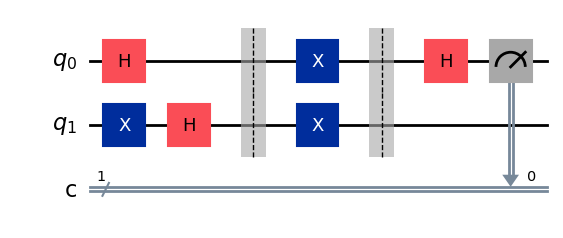

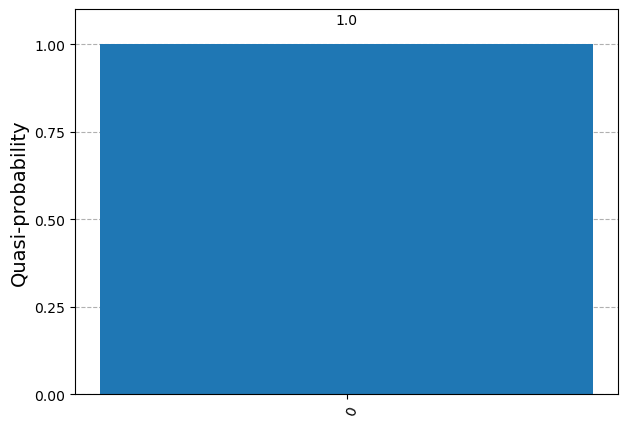

In [10]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_distribution
#first defining the object for simulator:
simulator_basic=BasicSimulator()

#for this Algorithm, we need quantum circuit (2 qubit), and only 1 classical bit for measurement
qc=QuantumCircuit(2,1)
qc.x(1)
qc.h(range(2))
qc.barrier(range(2))

#figuring out what the function is here. balanced or constant, function could be identity, or constant (eg. CNOT)
#function
#qc.cx(0,1) #Balanced
qc.x(range(2)) #constant
qc.barrier(range(2))

qc.h(0) #hadamard on qubit we wanna measure (qubit 0)
qc.measure(0,0)
display(qc.draw('mpl'))
result=simulator_basic.run(qc,shots=1024).result()
counts=result.get_counts() # how many times something was observed
plot_distribution(counts)


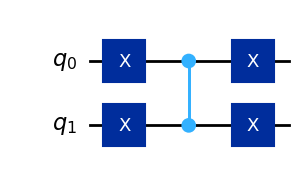

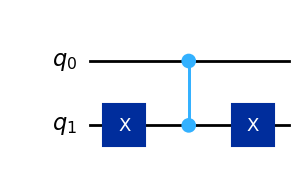

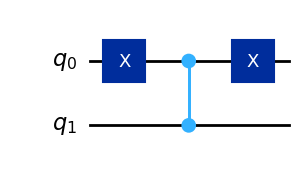

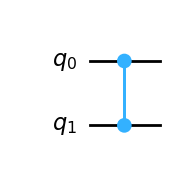

In [15]:
#Grover'sAlgorithm
#firt defining Oracle (for all possible choices)
oracle=[]  #wanna see 00, 01,10,11 in this list, so let's define a 'for' loop here:
for i in range(4):
    oracle_t=QuantumCircuit(2,name='oracle')
    if i==0:
        
        oracle_t.x(range(2)) # for showing 11, oracle should have control z,
        oracle_t.cz(0,1)     #we can change the trigger, by using x before and after it, eg. control z (cz)  is activated by (1,1)
        oracle_t.x(range(2)) # now if I wanna activate it by (0,1), both side of controller, I should place x gate before and after
    elif i==1:
        oracle_t.x(1) # here the qubit 0 (01) shouldn't change and qubit1 should be 0, qubit 0 should be 1, so x(1)
        oracle_t.cz(0,1)     
        oracle_t.x(1)
    elif i==2:
        oracle_t.x(0) # now on 0
        oracle_t.cz(0,1)     
        oracle_t.x(0)   
    else:
        oracle_t.cz(0,1) # here the trigger is 11, so no need to change anything
    oracle_t.to_gate()
    display(oracle_t.draw('mpl'))
    oracle.append(oracle_t) #each time oracle is being made, eg. oracle 0, it should be appended to the original oracle
        #Also it will be reset each time

for first one : it would make a negative phase for 00,
for 2nd : it would make a negative phase for 01,
for 3rd: it would make a negative phase for 10,
for 4th : it would make a negative phase for 11


In [29]:
#now we wanna make a funtion to visualize with it, also using qsphere(when entangled, can't use Bloch, so use qshere instead)from qiskit.visualization import plot_state_qsphere
#qiskit can plot distribution, or quasi_probability, but not the actual probability, so for that, let's use Matplotlib
import matplotlib.pyplot as plt
#Make a function to visualize Grover's :
def visualization(quantum_circuit):
    state = Statevector.from_instruction(quantum_circuit)
    display(state.draw('latex'))
    display((quantum_circuit).draw('mpl'))
    display(plot_state_qsphere(state))
    probs=state.probabilities()
    x_label=state.sample_counts(shots=1000).keys() # x_labels are our keys that we got from all of our state
    plt.figure()
    plt.bar(x_label,probs)
    plt.show()


<IPython.core.display.Latex object>

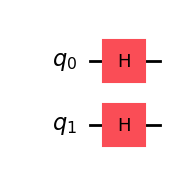

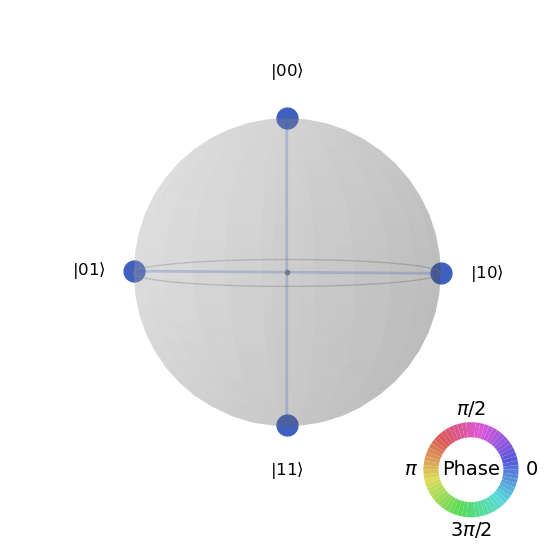

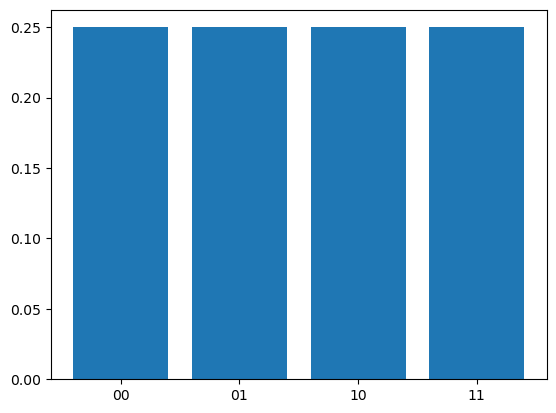

In [30]:
grover=QuantumCircuit(2)
grover.h(range(2))
visualization(grover)

by applying hadamard gate, we have superposition of all states,
Then having qsphere (showing phase, and rotation round z axis, also could show Amplitude change, but here amplitude is the same for all states, The chance of getting each state is equal to 0.25 as observed in the plot

<IPython.core.display.Latex object>

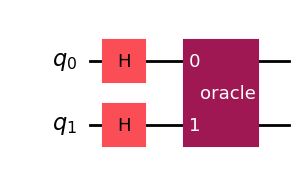

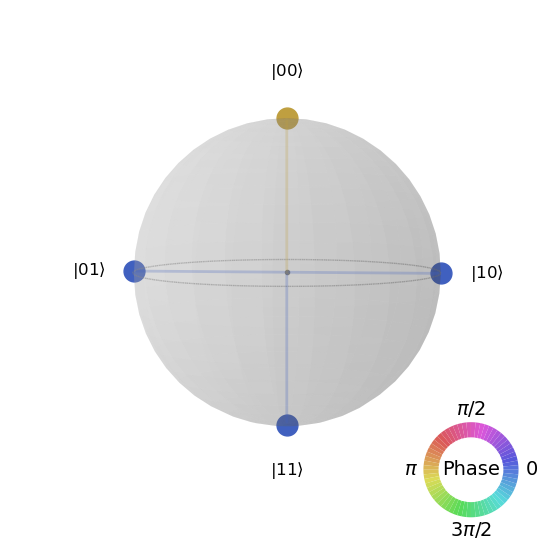

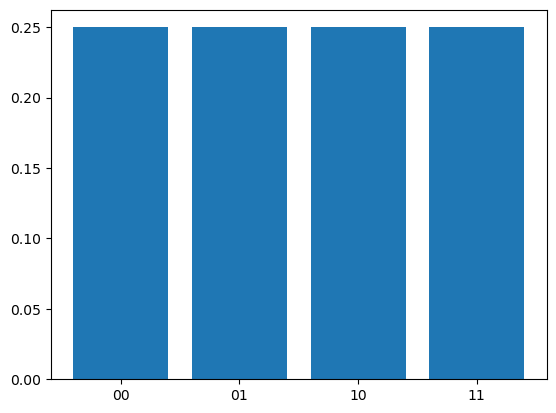

In [32]:
#Now wanna use the oracle we made before:
grover.append(oracle[0],range(2)) #wanna increase 00 probability, also should determine the order of adding using range()
visualization(grover)

So in above code I have first oracle, making 00 phase negative, colored as yellow in qsphere

<IPython.core.display.Latex object>

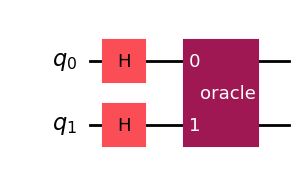

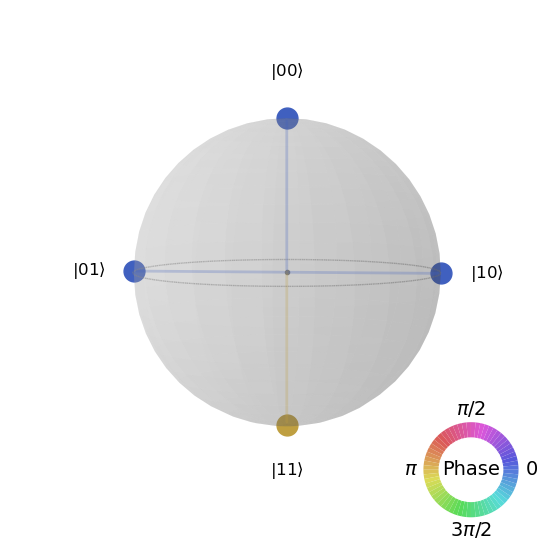

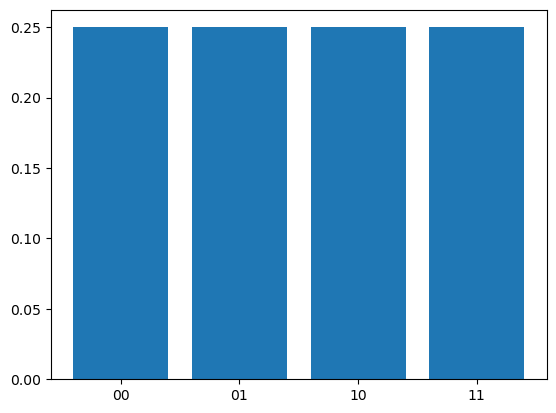

In [37]:
grover=QuantumCircuit(2)
grover.h(range(2))
grover.append(oracle[3],range(2))
visualization(grover)


So now, 11 has negative phase, the chance of observing each state is still 0.25,since we have global phase.
So for glaobal phase,it will only effect interference, not changing anything we observe here

<IPython.core.display.Latex object>

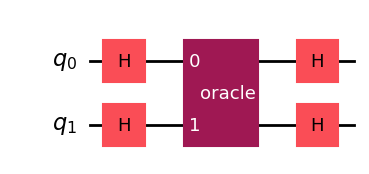

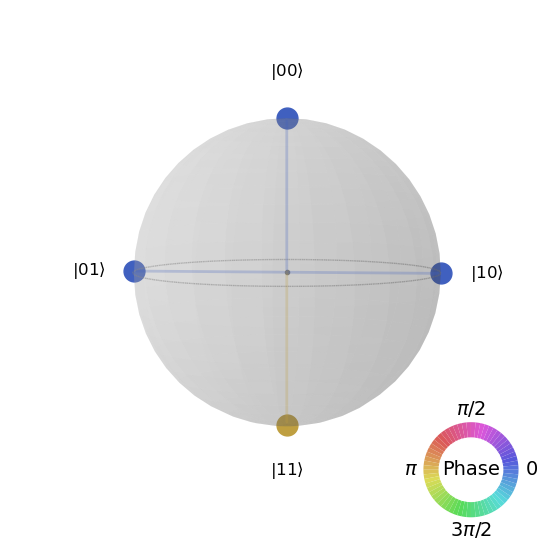

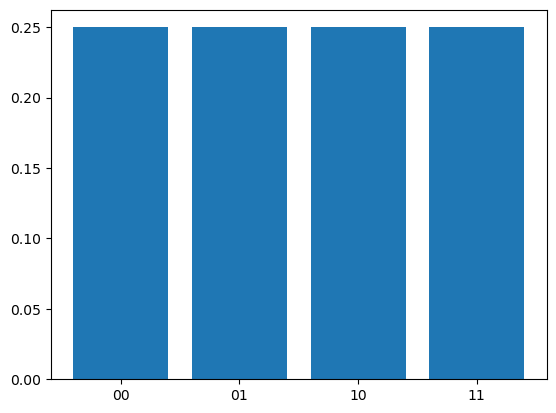

In [39]:
#Diffuser
#Detailed:
qc=grover.copy()
qc.h(range(2))
visualization(qc)

Also hadamard has no role here (cause of no change when having 11).The diffuser is always the same, this is oracle that is changing.So, diffuser could be ineffective or effective but it just doesn't change

<IPython.core.display.Latex object>

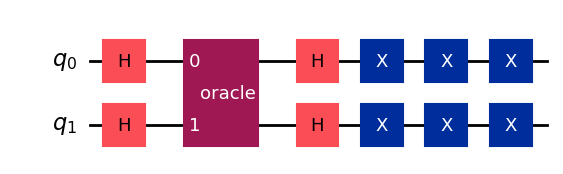

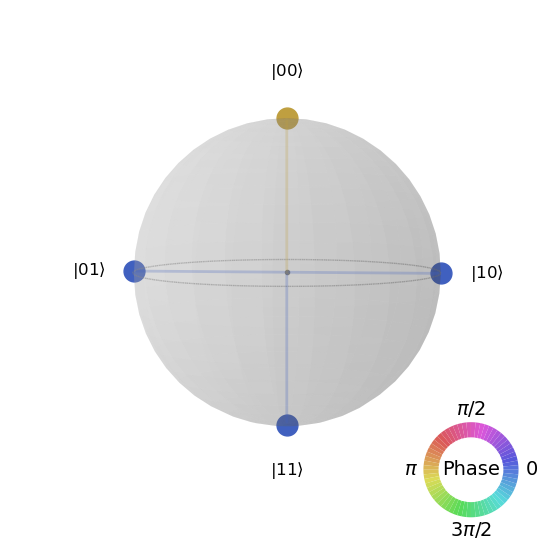

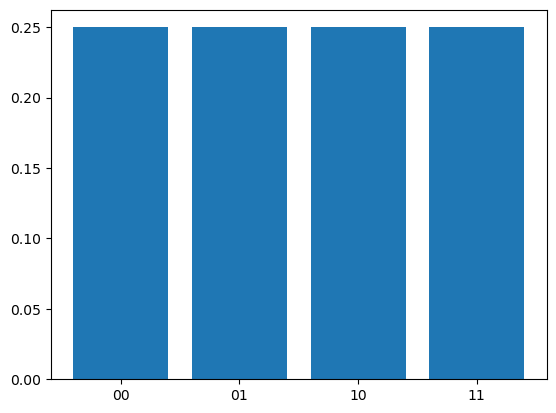

In [43]:
qc.x(range(2)) #Apply x on all of them
visualization(qc)


<IPython.core.display.Latex object>

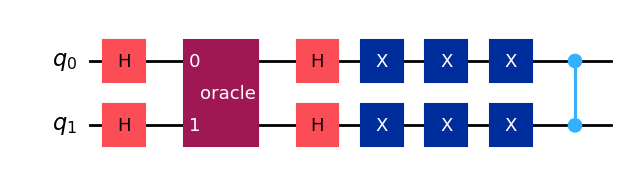

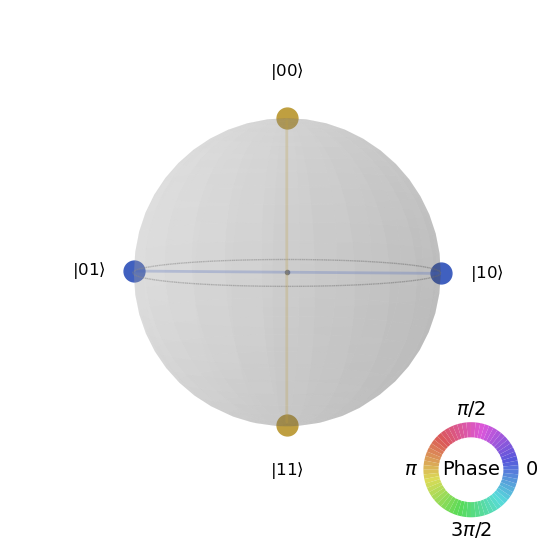

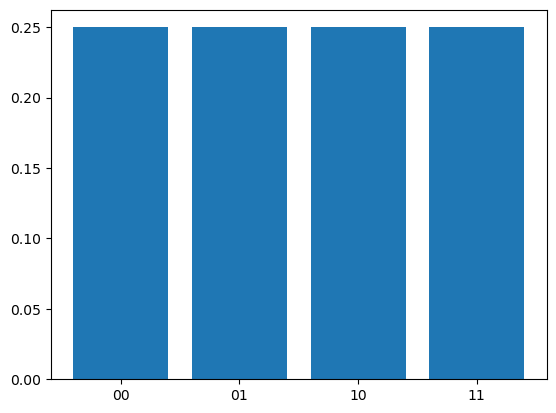

In [44]:
#now the phase is on 00, instead of 11 ( not flipped always/ that happened to be the case here/ not the trend)
qc.cz(0,1) #no difference where control z is applied,cz because of phase-kick back imply no difference on controler, and target
visualization(qc)

<IPython.core.display.Latex object>

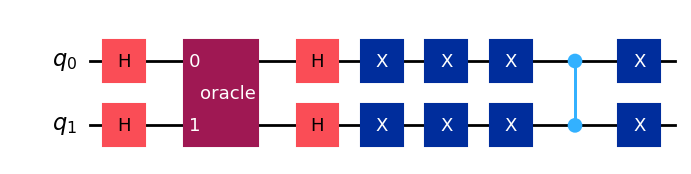

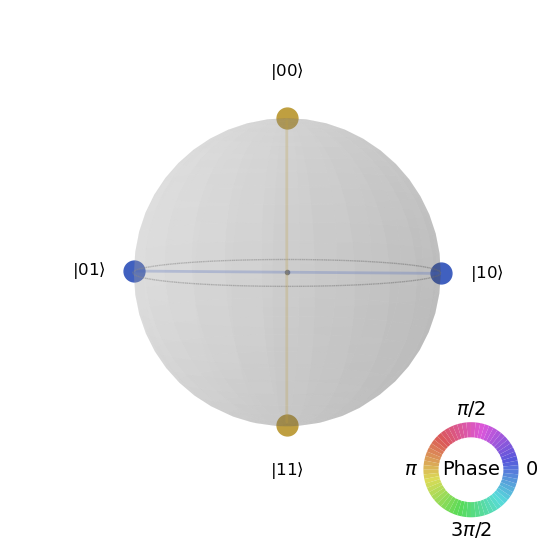

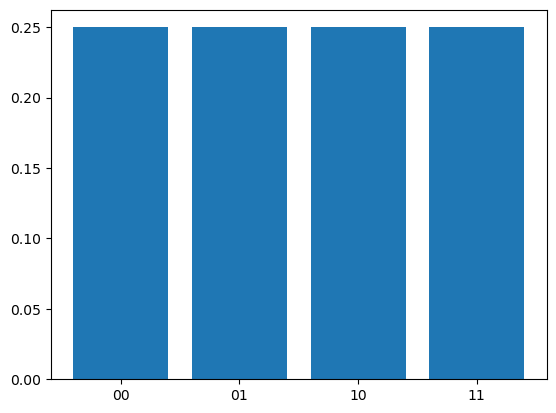

In [45]:
qc.x(range(2))
visualization(qc)


In [46]:
# still two negative phase, same probability as before

<IPython.core.display.Latex object>

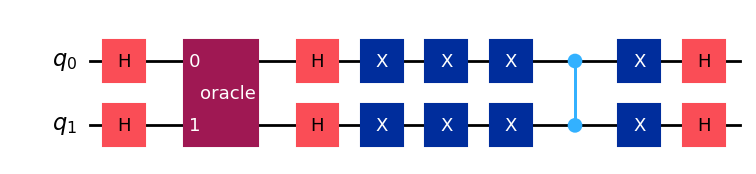

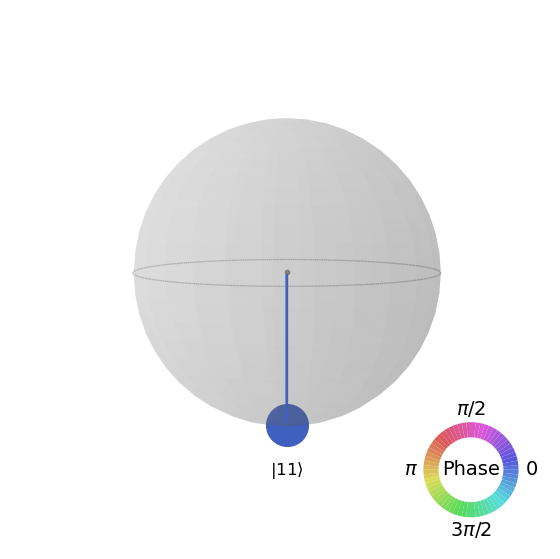

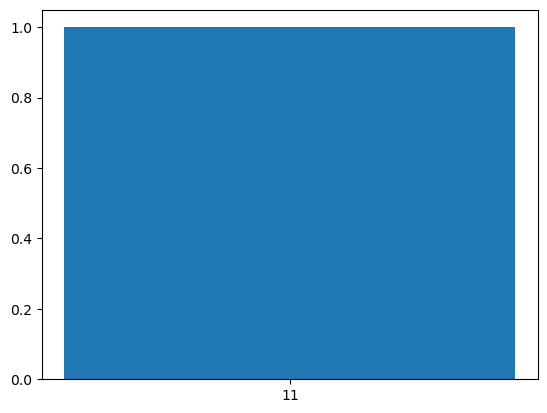

In [47]:
qc.h(range(2))
visualization(qc)


now it could be observed after applying hadamard, the output is the one we marked (11), the other probabilities other than 11 is zero.
Interference happend,and other states disappeared (the global phase is still there)

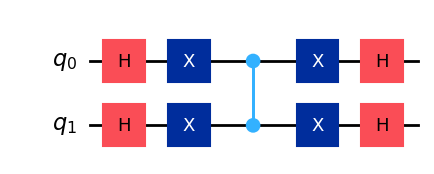

In [53]:
#Define diffuser as a gate: (reflection= diffuser)
reflection= QuantumCircuit(2,name=('diffuser'))
reflection.h(range(2))
reflection.x(range(2))
reflection.cz(0,1)
reflection.x(range(2))
reflection.h(range(2))
reflection.to_gate()
reflection.draw('mpl')

<IPython.core.display.Latex object>

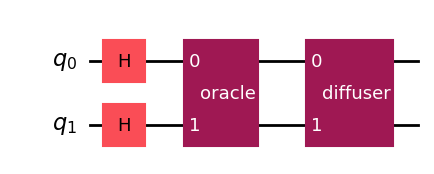

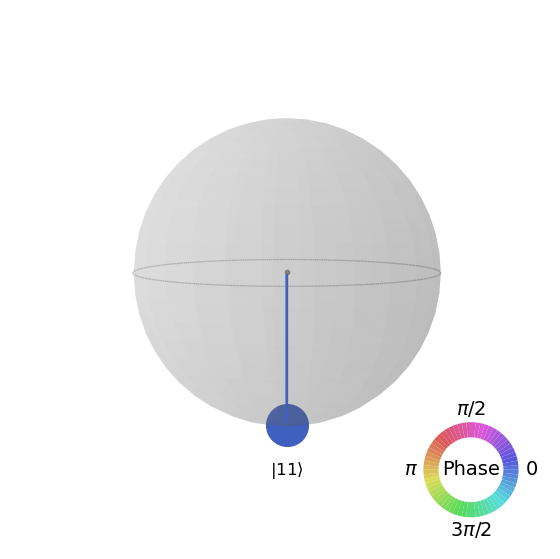

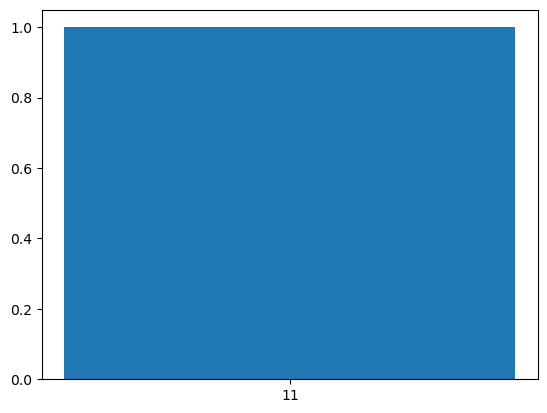

In [61]:
grover=QuantumCircuit(2)
grover.h(range(2))
grover.append(oracle[3],range(2)) #oracle[3]
#now append it on grover
grover.append(reflection,range(2))
visualization(grover) #gives output, not middle stages

<IPython.core.display.Latex object>

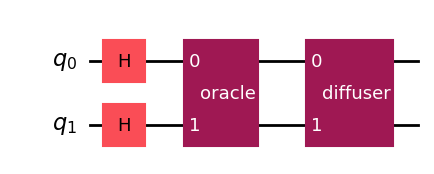

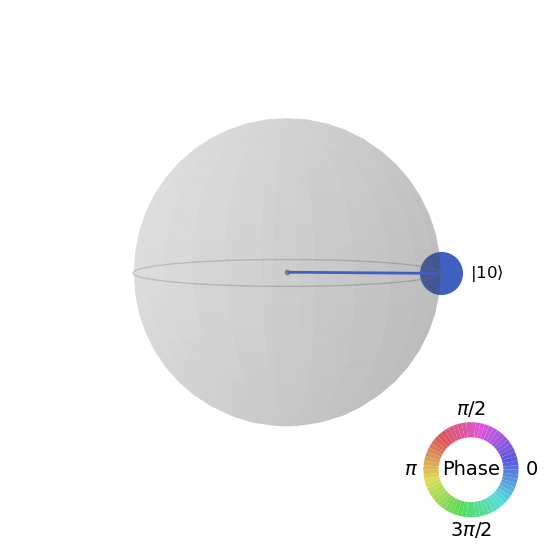

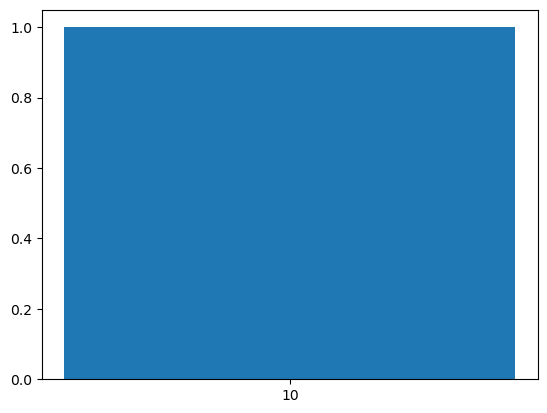

In [62]:
grover=QuantumCircuit(2)
grover.h(range(2))
grover.append(oracle[2],range(2)) #changing this: oracle[2]
#now append it on grover
grover.append(reflection,range(2))
visualization(grover) #gives output, not middle stages

 what if we increaze control z controller? 

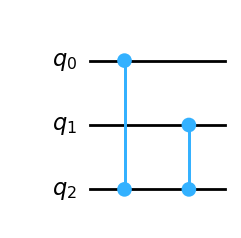

In [63]:
#How to perform on 3 qubits
from math import pi
qc=QuantumCircuit(3)
qc.cz([0,1],2)
qc.draw('mpl')

the above circuit is neither useful for oracle, nor diffuser, since controller all should be on the same vertical line 

So how to define such thing? I need another gate working with phase,to have multiple control(multicontrol phase)

if aplying z gate. the applied phase is pi, now using multicontrol phase with phase pi:mcp(phase,controler, target)

<IPython.core.display.Latex object>

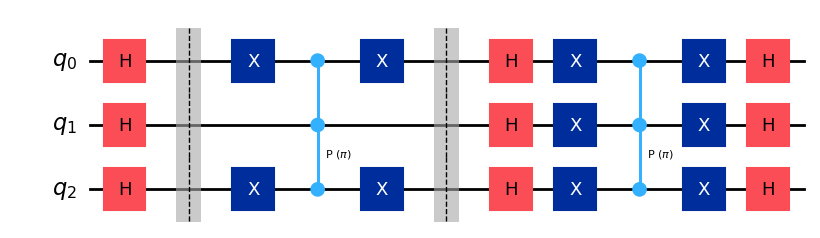

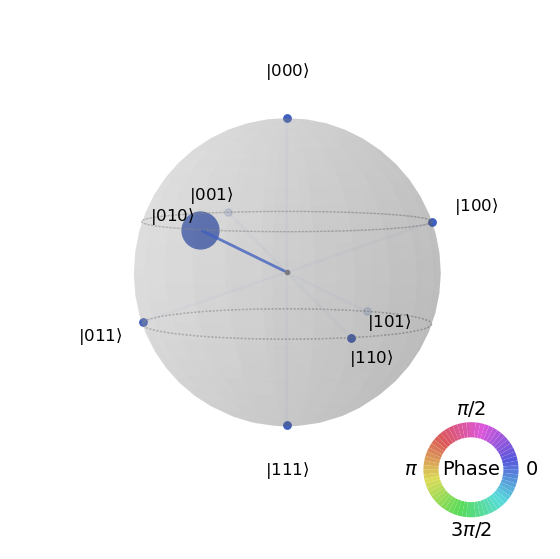

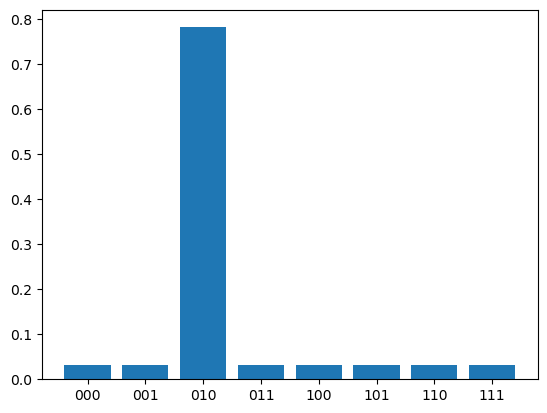

In [70]:
from math import pi
qc=QuantumCircuit(3)
qc.h(range(3))
qc.barrier(range(3))
qc.x([0,2]) #for oracle,now we're placing it between barriers 
qc.mcp(pi,list(range(2)),2) #mcp(phase,list[controler, target])
qc.x([0,2])
qc.barrier(range(3)) #after this barrier, we have the diffuser
qc.h(range(3))
qc.x(range(3))
qc.mcp(pi,list(range(2)),2) #sandwich the mcp between hadamard and x gate
qc.x(range(3))
qc.h(range(3))
visualization(qc)

we have 2 rows of oracle and diffuser in a consecutive maner here, first oracle marks the 010, then dffuser, showing output 010 which has the most probability, as observed above. diffuser is same as it always is, could get bigger by expand it as well. As number of  qubits increase, more oracle and diffusser is needed


now do the same thing with qiskit library to make it easier:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

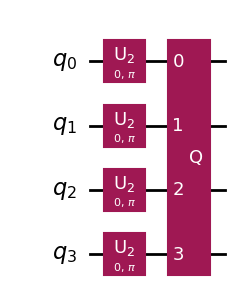

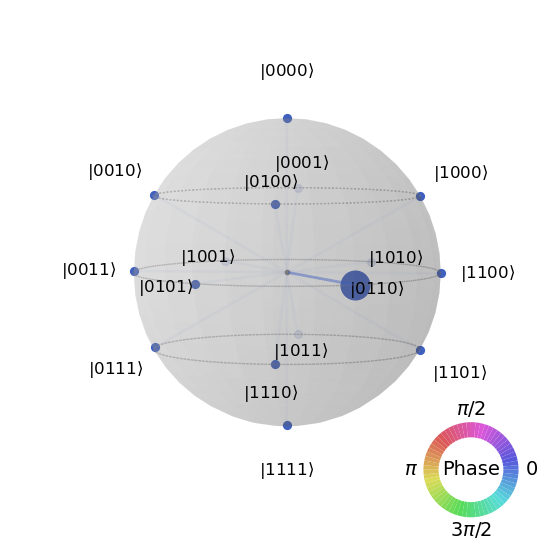

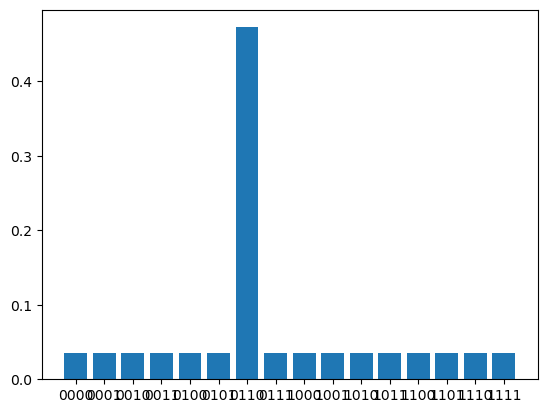

In [74]:
from qiskit.circuit.library import GroverOperator
#first define the grover circuit, also you should include the first hadamard yourself, since it's not part of grover here
number=4
grover=QuantumCircuit(number)
grover.h(range(number))
#now the mark state, is the statevector you obtained from quantum_info, for the mark state of oracle
mark_state=Statevector.from_label('0110') #from_label could build what you want,if you give it a string you want to mark
display(mark_state.draw('latex')) #since it's a statevector, not circuit 'mpl' won't work, only 'latex' works
# the .from_label('state') would build the desired statecector for us, which we will use here:
#The grover_op is being made from the GroverOperator class as such:GroverOperator(mark state,etc like insert_barriers=True)
grover_op=GroverOperator(mark_state,insert_barriers=True) #the thing is: we should have the quantumcircuit(grover)
#Then append it to the grover_op we built above, with the order we had before (range(number)) and that order is important:
grover.append(grover_op,range(number))
visualization(grover.decompose()) #need to be decomposed here, otherwise it would only show a box


<IPython.core.display.Latex object>

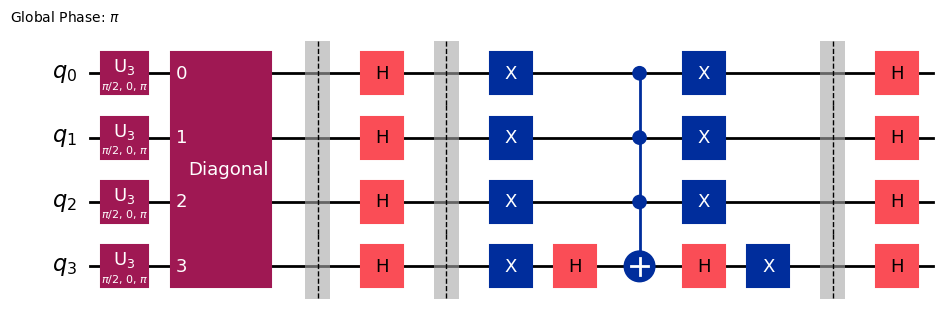

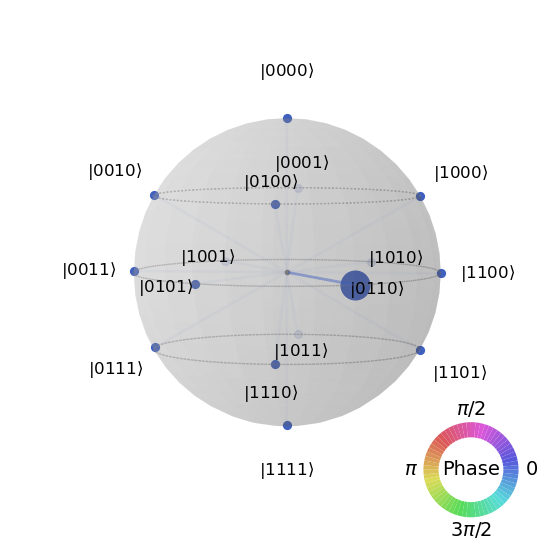

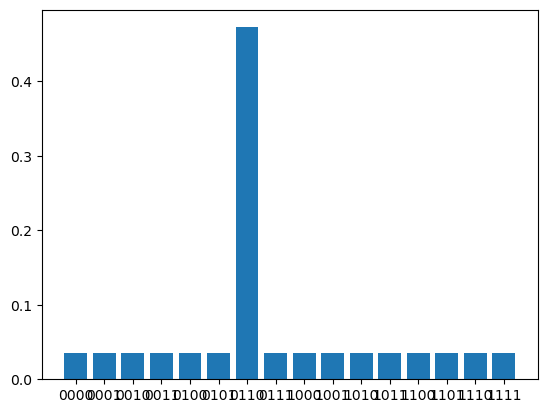

In [75]:
#since oracle aove is in Q box, need to aply decompose twicw here:
visualization(grover.decompose().decompose())

#it could be observed that Diffuser is same as before, also instead of mcp,we use 2 more hadamards increasing circuit depth
#as couldbe observed above using multi control CNOT, and sandwiching its target between 2 hadamards would give multiple control z
#it still doesn't show inside oracale, and using .decompose() wouldn't help much, since it would give messy result


<IPython.core.display.Latex object>

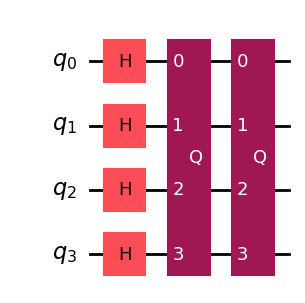

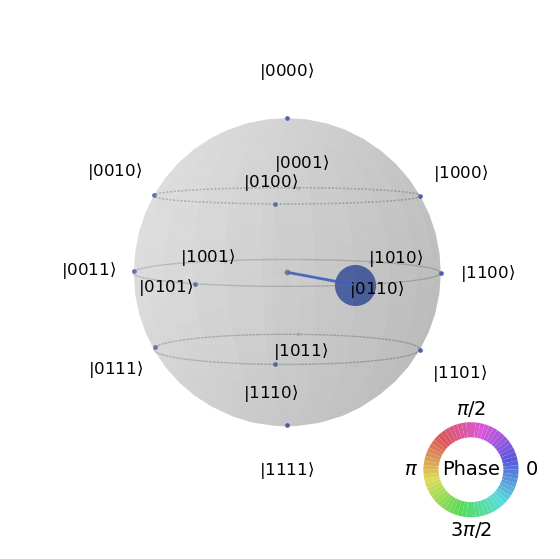

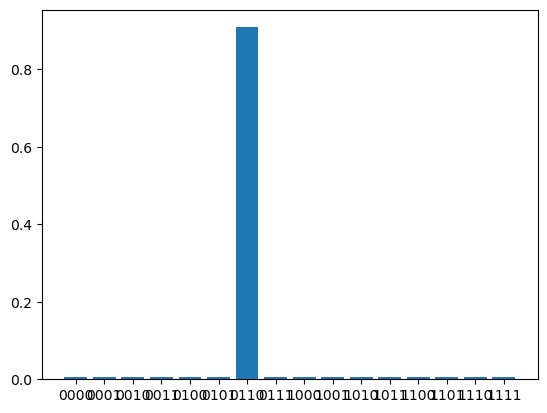

In [77]:
#appending on the grover we had up until now, would give 100% for probability distribution:
grover.append(grover_op, range(number))
visualization(grover)

The probability is now not absolute 100%, but it is way more than previous one

#for teleportation, we have mid-circuit measurement,then given that measurement, we decide on other gates to apply
considering the classical bits we have, also it doesn't work with quantum_info and BasicSimulator,it only works with AerSimulator

In [79]:
!pip install qiskit-aer

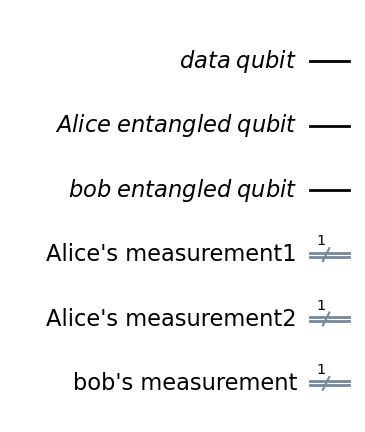

In [109]:
#Wanna have a neat circuit, so we define using registers:
from qiskit import QuantumRegister,ClassicalRegister,transpile
#for showing that psi wasteleported, need to use random unitary, which will be applied on teleported information
from qiskit.quantum_info import random_unitary
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator 
u=random_unitary(2)
ugate=u.to_instruction()
#since we have measurement, better to use instruction for making U gate 
#just to be safe than sorry, use to_insttruction rather that to.gate()whenever having measurement)
#let's also make udagger
udaggergate=u.adjoint().to_instruction()
dataQ=QuantumRegister(1,'data qubit') #THe data Alice would send to Bob
aliceQ=QuantumRegister(1,'Alice entangled qubit')
bobQ=QuantumRegister(1,'bob entangled qubit')
#alice should have two classical bit to convey information using them
aliceC1=ClassicalRegister(1,"Alice's measurement1") #for first measurement
aliceC2=ClassicalRegister(1,"Alice's measurement2") #for second measurement
bobC=ClassicalRegister(1,"bob's measurement") #Bob haas only 1 classical register
#now builing our quantum circuit:
qc=QuantumCircuit(dataQ,aliceQ,bobQ,aliceC1,aliceC2,bobC)
qc.draw('mpl')




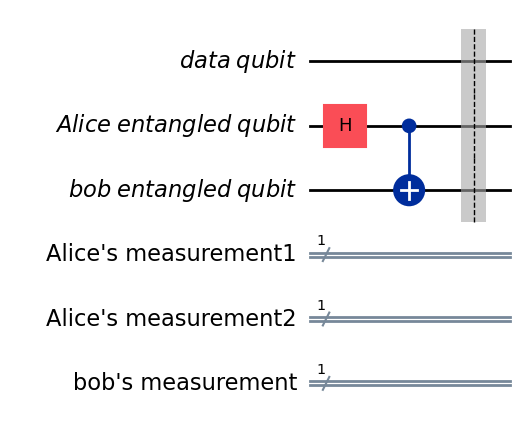

In [110]:
#first making the entangled state, using Bell state:
qc.h(aliceQ[0]) #Now that we're using Register, we just give the register rather than the qubit
qc.cx(aliceQ[0], bobQ[0])
qc.barrier() 
qc.draw('mpl')
#Now we have entagled qubits that Alice and bob shared

now using random unitary, to apply quantum information on data qubit, 
and apply inverse bell beween data qubit and alice qubit

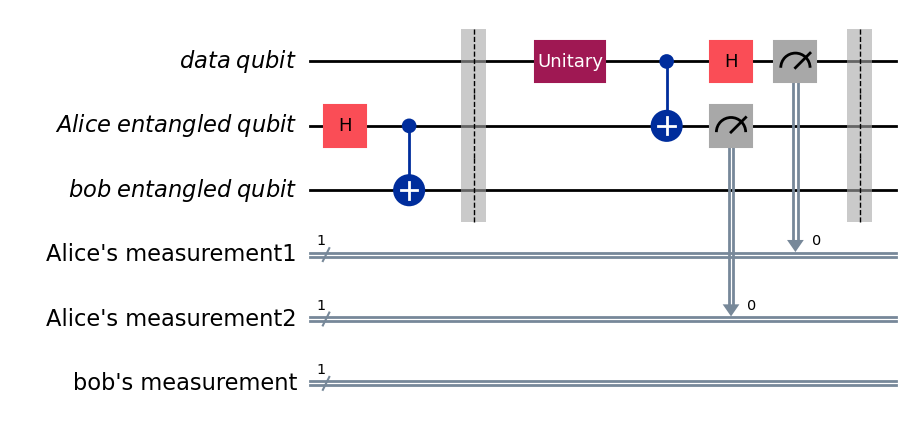

In [111]:
#instead of numbers, should say the registers names
qc.append(ugate, [dataQ[0]])
qc.cx(dataQ[0], aliceQ[0])
qc.h(dataQ[0])
qc.measure(dataQ,aliceC1[0])
qc.measure(aliceQ[0],aliceC2[0])
qc.barrier()
qc.draw('mpl')

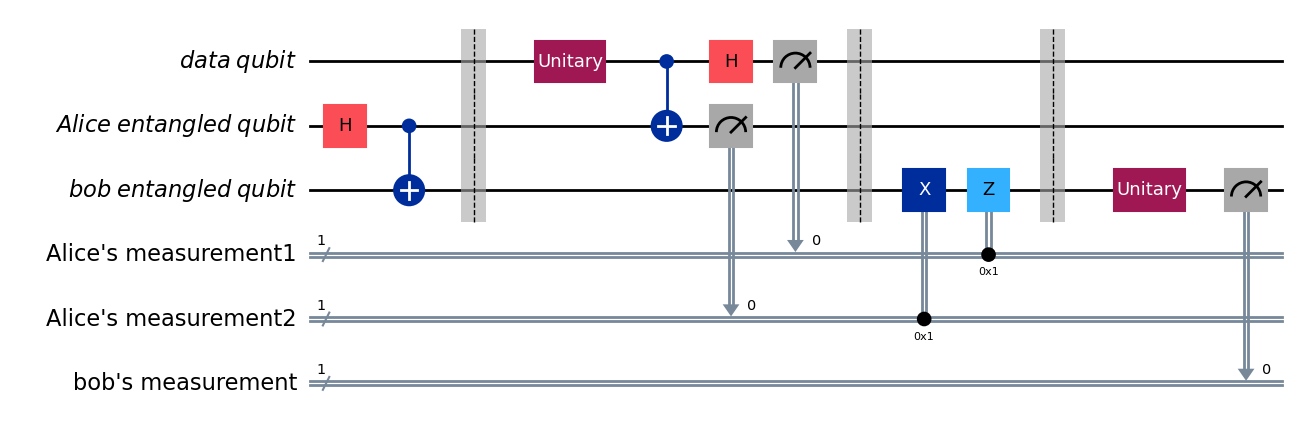

In [112]:
#Now that the measurement is done, it should be shared with bob as such:
#for that doing mid-circuit measurement by applying x().c_if()
qc.x(bobQ[0]).c_if(aliceC2,1)
qc.z(bobQ[0]).c_if(aliceC1,1)
qc.barrier() 
#the data qubit that is teleported, if dagger of the U gate is applied on it, it suppose to give the initial state of zero
#now if we do the same tthing on teleported information, by getting zero as expected, it's proved it is teleported as expected
qc.append(udaggergate,[bobQ[0]])
qc.measure(bobQ[0],bobC[0]) # measuring bob qubit on its classical bit
qc.draw('mpl')

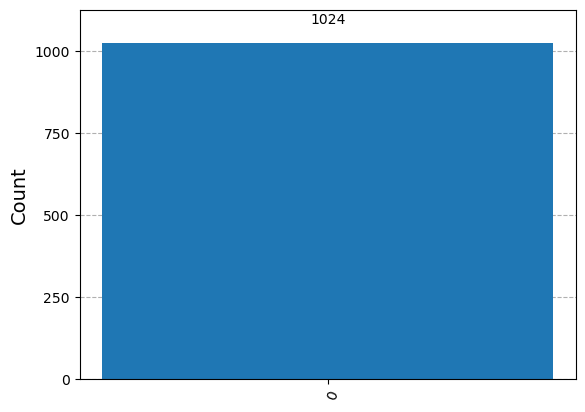

In [113]:
#Using marginal count,

from qiskit.result import marginal_counts
sim=AerSimulator()
compiled=transpile(qc,sim) # transpile, spcifically because of unitary operator we have here
result=sim.run(compiled).result()
counts=result.get_counts()
#Now we need marginal result here, to put marginal counts in it, needing qubit 2, using indices=2 here
marginal_result=marginal_counts(counts,indices=[2]) # i want qubit 2 here
plot_histogram(marginal_result)

#now we see zero, the probability for it, so my qubit is transported
